In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
V1 = np.random.randn(5, 3)
print(V1.shape, V1)
V2 = V1.ravel()
print(V2.shape, V2)

(5, 3) [[-0.55951703  0.08163735  0.74110208]
 [ 0.77869851 -0.28754058  0.44714848]
 [-0.74369461 -0.65383239 -1.41223347]
 [ 0.30722316  0.32799224  0.35298429]
 [-0.63930036 -1.20884845 -0.13182655]]
(15,) [-0.55951703  0.08163735  0.74110208  0.77869851 -0.28754058  0.44714848
 -0.74369461 -0.65383239 -1.41223347  0.30722316  0.32799224  0.35298429
 -0.63930036 -1.20884845 -0.13182655]


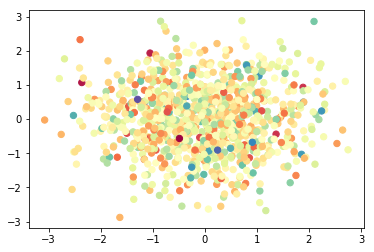

In [49]:
X = np.random.randn(2, 1000)
Y = np.random.randn(1, 1000)
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral, marker='o')

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


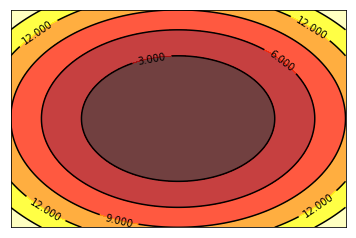

In [100]:
# Z function
def f(x, y):
    #return x + y
    #return x * y
    return x**2 + y**2
    #return np.log(x * y)
    #return np.exp(x * y)
    #return np.sin(x) + np.cos(y)
    #return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(- x ** 2 - y ** 2)

# data build
n = 100
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)

# data to mesh
X, Y = np.meshgrid(x, y)

# compute Z
Z = f(X, Y)

# separate count
sepCount = 5

# fill contour inner with color
plt.contourf(X, Y, Z, sepCount, alpha = 0.75, cmap = plt.cm.hot)

# draw contour outline
C = plt.contour(X, Y, Z, sepCount, colors = 'black', linewidth = 0.5)

# draw contour label
plt.clabel(C, inline = True, fontsize = 10)

# remove axis
plt.xticks(())
plt.yticks(())
plt.show()

In [4]:
z = np.array([-2,1,4,0,-0.5,6])
print(z)
z[z < 0] = 0
print(z)

[-2.   1.   4.   0.  -0.5  6. ]
[0. 1. 4. 0. 0. 6.]


In [5]:
A1 = np.asarray([[1, 1, 1]])
A2 = np.array([[.8,.9,0.4]])
print(A1)
print(A2)

[[1 1 1]]
[[0.8 0.9 0.4]]


**推导过程如下:**

-   $L(a,y)=-[ylog(a)+(1-y)log(1-a)]$

-   由链式法则可知：

$$ \frac{\partial L}{\partial w} =  \frac{\partial L}{\partial a} \frac{\partial a}{\partial z} \frac{\partial z}{\partial w}$$
$$ \frac{\partial L}{\partial b} =  \frac{\partial L}{\partial a} \frac{\partial a}{\partial z} \frac{\partial z}{\partial b}$$

-   很容易算出:
$$\frac{\partial L}{\partial a} = - \frac{y}{a}+\frac{1-y}{1-a} = \frac{a-y}{a(1-a)}$$

-   由于: $a = \frac{1}{1+e^{-z}}$，则有$$\frac{\partial a}{\partial z} = a(1-a)$$

-   还有: $z = w_1x_1+w_2x_2+b$,故$$\frac{\partial z}{\partial w}=[x_1, x_2]$$
-   同理有: $\frac{\partial z}{\partial b} = 1$

-   得到:
$$\begin{align} \frac{\partial L}{\partial w} =\frac{\partial L}{\partial a} \frac{\partial a}{\partial z} \frac{\partial z}{\partial w}  &= \frac{a-y}{a(1-a)} a(1-a)x \\ &= (a-y)x \end{align}$$
<br>
$$\begin{align} \frac{\partial L}{\partial b} =\frac{\partial L}{\partial a} \frac{\partial a}{\partial z} \frac{\partial z}{\partial b}  &= \frac{a-y}{a(1-a)} a(1-a) \\ &= (a-y)\end{align}$$


-   下面分别求$dw,db,dA^{[l-1]}$:
- $dw = \frac{∂L}{∂a} \frac{∂a}{∂z} \frac{∂z}{∂w}$
    - 已经知道了$\frac{∂L}{∂a} \frac{∂a}{∂z}=dz$,现在的唯一目标就是求$ \frac{∂z}{∂w}$。
    - 而我们又知道$z=wA^{[l-1]}+b$,所以就可求得$ \frac{∂z}{∂w}=A^{[l-1]}$
    - 综上就可以得到$dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T}$

-   同理可知由$\frac{∂z}{∂b}=1$, $\frac{∂z}{∂A^{[l-1]}}=w$很容易得到式**$db^{[l]}$** 和 **$dA^{[l-1]}$**


In [9]:
x = np.array([
    [0, 3, 4],
    [1, 6, 4]])
#默认参数ord=None，axis=None，keepdims=False
print("默认参数(矩阵整体元素平方和开根号，不保留矩阵二维特性)：",np.linalg.norm(x))
print("矩阵整体元素平方和开根号，保留矩阵二维特性：",np.linalg.norm(x,keepdims=True))
print("矩阵每个行向量求向量的2范数：\n",np.linalg.norm(x,axis=1,keepdims=True))
print("矩阵每个列向量求向量的2范数：",np.linalg.norm(x,axis=0,keepdims=True))
print("矩阵1范数：",np.linalg.norm(x,ord=1,keepdims=True))
print("矩阵2范数：",np.linalg.norm(x,ord=2,keepdims=True))
print("矩阵∞范数：",np.linalg.norm(x,ord=np.inf,keepdims=True))
print("矩阵每个行向量求向量的1范数：\n",np.linalg.norm(x,ord=1,axis=1,keepdims=True))

默认参数(矩阵整体元素平方和开根号，不保留矩阵二维特性)： 8.831760866327848
矩阵整体元素平方和开根号，保留矩阵二维特性： [[8.83176087]]
矩阵每个行向量求向量的2范数：
 [[5.        ]
 [7.28010989]]
矩阵每个列向量求向量的2范数： [[1.         6.70820393 5.65685425]]
矩阵1范数： [[9.]]
矩阵2范数： [[8.70457079]]
矩阵∞范数： [[11.]]
矩阵每个行向量求向量的1范数：
 [[ 7.]
 [11.]]


In [27]:
def differenceXY(x, y):
    numerator = np.linalg.norm(x - y)
    denominator = np.linalg.norm(x) + np.linalg.norm(y)
    difference = numerator / denominator
    print(numerator, denominator) 
    return difference

print(differenceXY(1,2))
print('----------------------------')
print(differenceXY(np.array([1, 2]),np.array([2, 10])))

1.0 3.0
0.3333333333333333
----------------------------
8.06225774829855 12.434107004685359
0.648398614010686


In [34]:
print(np.nan)
print(np.nansum([1, np.nan]))
print(np.sum([1, np.nan]))

nan
1.0
nan
